A média das médias
==================

## **Discentes:** José David e Eric Leandro


## Objetivo



Crie ou obtenha um conjunto de dados numéricos que representa uma variável aleatória (certifique-se que seu conjunto de dados tem pelo menos 100 itens). Considere que este conjunto de dados é a sua população. Compute e reporte a média desta população.

Realize o processo de amostragem aleatória sem reposição neste conjunto de dados 100 vezes. Cada vez que realizar a amostragem, colete um certo número de dados (algo entre 25% e 75% dos dados, escolha o valor que preferir), compute a média das suas amostras e registre estas médias em uma lista.

Compute a média da lista de médias que obteve e compare este valor com a média da população. Discuta seu resultado.



## Métodos:

Para evitar o envio de um arquivo zip com a planilha de dados ou uso do numpy.random, decidimos fazer uso da biblioteca seaborn para importar um conjunto de dados e realizar os cálculos estatísticos. Para além disso, a seleção dessa biblioteca foi feita por já termos um pouco mais de familiaridade com ela devido a disciplina de Aprendizado de Máquina<sup>[4][5].</sup><br>
Inicialmente, as bibliotecas Seaborn<sup>[1]</sup>, Matplotlib<sup>[2]</sup>, e Statistics<sup>[3]</sup>, e Random<sup>[7]</sup>, foram importadas para, respectivamente, carregar os dados importados, gera alterações em gráficos plotados, realizar o cálculo da média e sorteadr aleatóriamente os dados.

In [67]:
import seaborn as sbn
import matplotlib.pyplot as plt
import statistics as st
import random

Utilizamos a Seaborn para  exibir a lista de nomes dos datasets importaveis e em seguida carregar um deles. O dataset escolhido é referente a dados de algumas espécies pinguins que habitam ilhas da Península Antartia. O atributo escolhido para análise de média foi o "body_mass_g", a massa corporal do pinguim em gramas. Sabe-se que a massa corporal do pinguim vária conforme a espécie, então por isso, relizamos uma filtragem para apenas analisarmos a massa corporal da espécie gentoo e descartamos as linahs em que possuiam o float Not a Number no lugar de um valor numérico de massa corporal. Assim, obtivemos um conjunto com 123 itens para podermos realizar o processo de amostragem. 

In [68]:
nomes = sbn.get_dataset_names()
print(nomes)

pinguins = sbn.load_dataset('penguins')
#display(pinguins)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [69]:
filtro = (pinguins['species'] == 'Gentoo')
pinguins_escolha = pinguins[filtro].dropna(subset = ['body_mass_g'])
display(pinguins_escolha)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,Female
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,Male
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Para calcular a média, o comando tolist foi utilizado para transformar a coluna de dados de massa corporal em uma lista que poderia ter seu valor médio calculado por meio da função st.mean.

In [70]:
media_total = st.mean(pinguins_escolha['body_mass_g'].tolist())
print(f"A média de massa corporal dos pinguins Gentoo é {media_total}")

A média de massa corporal dos pinguins Gentoo é 5076.016260162602


Para realização da amostragem, uma lista onde as médias seriam adicionadas foi criada e por meio de um laço for que se repetiria 100 vezes, 50 diferentes itens da lista(equivalentes a 40,65% do conjunto) eram sorteados pela função random.sample e em seguida era adicionado na lista de médias a média desse valor sorteado. Ao fim, usamos o print para exibir a lista, sua média e a média do conjunto total. Notamos que a média da lista de média acabou sendo bem semelhante à media do conjunto total.

In [71]:
lista_com_medias = []
for _ in range(100):            
    sorteados = random.sample(pinguins_escolha['body_mass_g'].tolist(),k = 50) 
    lista_com_medias.append(st.mean(sorteados))

media_lista = st.mean(lista_com_medias)

print(f'Lista de médias:\n{lista_com_medias}\n')
print(f'A média da lista de médias é {media_lista} enquanto a média do conjunto total é de {media_total}')

Lista de médias:
[5050.0, 5025.0, 5089.0, 5122.0, 5090.5, 5047.0, 5081.5, 5103.0, 5078.0, 5059.5, 5039.0, 4999.0, 5095.0, 5043.5, 5026.0, 5012.5, 5061.5, 5196.0, 5062.5, 5108.0, 5013.0, 4983.0, 5098.5, 5049.0, 5114.0, 5031.0, 4995.0, 5032.0, 5057.5, 5123.0, 5088.5, 5190.5, 5015.0, 5130.0, 5081.5, 5031.5, 5020.5, 5106.5, 5097.0, 5103.0, 5013.0, 5039.5, 5122.5, 5010.5, 5010.5, 5163.5, 5014.0, 5047.5, 5033.0, 5067.0, 5033.0, 5135.5, 5157.0, 5098.0, 4953.0, 5111.0, 5079.0, 5095.0, 5050.5, 4991.5, 5072.5, 5048.5, 5137.0, 5155.0, 5048.5, 5192.5, 5031.0, 5019.5, 5035.5, 5115.5, 5068.5, 5069.5, 5101.5, 5015.0, 5122.0, 4999.0, 5074.0, 5103.5, 5065.0, 4993.5, 5124.5, 5200.0, 5197.0, 5040.5, 5105.5, 5066.0, 5054.0, 4997.0, 5008.5, 5031.0, 5078.5, 5038.5, 5052.5, 4990.0, 5160.0, 5064.0, 5076.0, 4963.0, 5147.0, 5141.5]

A média da lista de médias é 5069.75 enquanto a média do conjunto total é de 5076.016260162602


Para compreender melhor a forma com que as médias dos valores sorteados estavam distribuidas, a função hisplot do Seaborn foi utilizada para plotar um histograma dos valores. Para além disso, o Matplotlib foi usado para marcar uma linha vertical na média do conjunto total e na média das médias. <br>

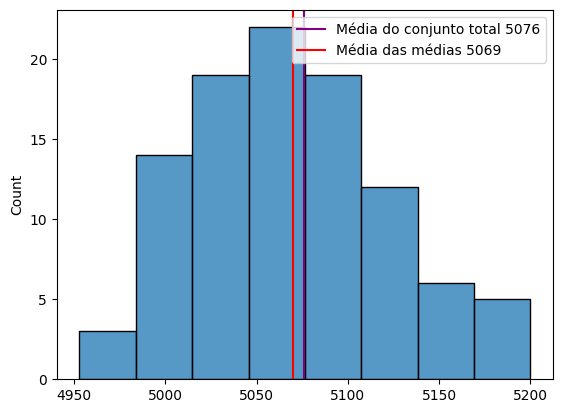

In [72]:
sbn.histplot(x= lista_com_medias)
plt.axvline(media_total, color = 'purple', label = f'Média do conjunto total {int(media_total)}') #Transformei para inteira para não ocupar muito espaço na legenda
plt.axvline(media_lista, color = 'red', label = f'Média das médias {int(media_lista)}')
plt.legend()


Observando a semelhança entre a média da lista de média e a média do conjunto, decidimos criar uma loop for dentro de outro e plotar um gráfico de valores médios de listas de médias por quantidade de vezes sorteadas para conferir se a quantidade de sorteios tinha alguma relação com a proximidade com a média do conjunto. <br> De forma resumida, a célula abaixo faz o processo de calcular a média de uma lista de médias e vai variando a quantidade de vezes que os 50 itens são sorteados. Essa variação vai de 1 sorteio aleatorio até 2000 sorteios aleatorio. Em seguida, A função lineplot do Seaborn permite a exibição do valor da média da lista de médias para cada quantidade de sorteios. Algumas funções da Matplotlib são utilizadas para editar legendas e atribuir uma linha horizontal no valor da média do conjunto total.<br><br>
Analisando o gráfico, pode-se conferir que quanto mais repetições aleatória são feitas, mais o valor médio da lista de médias se aproxima da média do conjunto total.

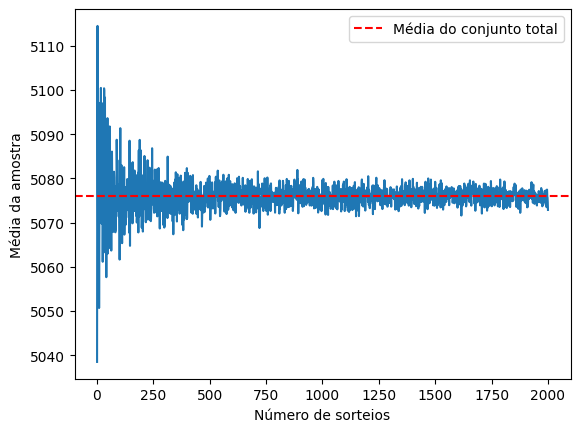

In [73]:
lista_de_medias_de_medias = []
repeticoes = []
for i in range(1,2001):
    lista_de_medias = []
    for _ in range(i):
        sorteados = random.sample(pinguins_escolha['body_mass_g'].tolist(),k = 50) 
        lista_de_medias.append(st.mean(sorteados))
    repeticoes.append(i)
    lista_de_medias_de_medias.append(st.mean(lista_de_medias))
    
sbn.lineplot(y = lista_de_medias_de_medias, x = repeticoes)
plt.xlabel("Número de sorteios")
plt.ylabel("Média da amostra")
plt.axhline(media_total,color='r', linestyle='--', label='Média do conjunto total')

plt.legend()

Refazendo a amostragem, mas realizando 1 milhão de repetições ao invés de cem, pode-se notar que a média da lista de médias se aproximava muito da média do conjunto e a plotagem do histograma mostrou algo muito semelhante a uma Gaussiana.

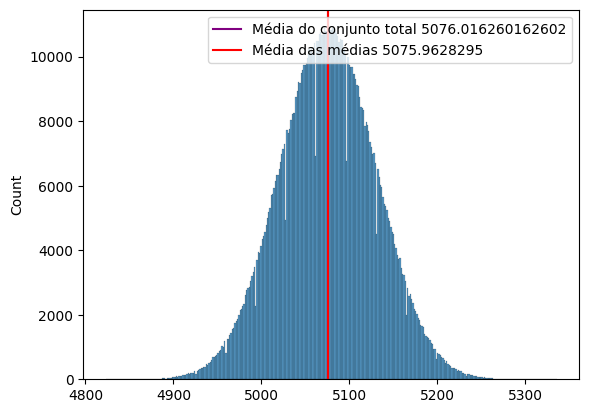

In [82]:
lista_com_medias = []
for _ in range(1000000):            
    sorteados = random.sample(pinguins_escolha['body_mass_g'].tolist(),k = 50) 
    lista_com_medias.append(st.mean(sorteados))

media_lista = st.mean(lista_com_medias)

sbn.histplot(x= lista_com_medias)
plt.axvline(media_total, color = 'purple', label = f'Média do conjunto total {media_total}') #Transformei para inteira para não ocupar muito espaço na legenda
plt.axvline(media_lista, color = 'red', label = f'Média das médias {media_lista}')
plt.legend()

## Resultado e discussão



Pesquisando um pouco a respeito, descobrimos que as aproximações que ocorreram entre a média das médias com a média do conjunto poderia ser explicada com a Lei Forte dos Grandes Números. Segundo essa lei, o valor médio dos resultados da realização da mesma experiência repetidas vezes tende a se aproximar do valor esperado à medida que mais tentativas ocorrem. Ou seja, quanto mais tentativas ocorrem, mais a probabilidade da média aritmética dos resultados observados irá se aproximar da probabilidade real.<sup>[5][8]</sup>

$$
P\left(\lim_{{n \to \infty}} \frac{S_n}{n} = \mu\right) = 1
$$

<br> Isso explica fato da média da lista de médias se aproximar mais da média do conjunto total para o caso em que houveram um milhão de sorteios do que para o caso em que houveram apenas cem sorteios.

## Referências

[1] seaborn.objects.Lines — seaborn 0.12.2 documentation. Disponível em: <https://seaborn.pydata.org/generated/seaborn.objects.Lines.html>. Acesso em: 18 ago. 2023.

‌[2] matplotlib.pyplot — Matplotlib 3.5.3 documentation. Disponível em: <https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html>. Acesso em: 18 ago. 2023.

‌[3] statistics — Mathematical statistics functions — Python 3.7.2 documentation. Disponível em: <https://docs.python.org/3/library/statistics.html>. Acesso em: 18 ago. 2023.

‌[4] JOSEDAVID23038. Aprendizado-de-M-quina/Dados 1 at main · joseDavid23038/Aprendizado-de-M-quina. Disponível em: <https://github.com/joseDavid23038/Aprendizado-de-M-quina/tree/main/Dados%201>. Acesso em: 19 ago. 2023.

‌[5] ERICLEANDRO. https://github.com/EricLeandroLM/Estatistica/tree/b78c700f46b13173b0e262ffddbacef4f5c4da94/Dados%201. Acesso em: 19 ago. 2023.

[6] DOS, C. Teorema Fundamental da Probabilidade. Disponível em: <https://pt.wikipedia.org/wiki/Lei_dos_grandes_n%C3%BAmeros#:~:text=fun%C3%A7%C3%A3o%20caracter%C3%ADstica%20existir.->. Acesso em: 19 ago. 2023.

[7] random — Generate pseudo-random numbers — Python 3.8.2 documentation. Disponível em: <https://docs.python.org/3/library/random.html>. Acesso em: 19 ago. 2023.

‌[8] Teoremas Limites. Disponível em: <https://www.inf.ufsc.br/~andre.zibetti/probabilidade/teoremas-limite.html#Lei_Grandes_N%C3%BAmeros>. Acesso em: 19 ago. 2023.

‌
‌

‌

## Playground

